The data was obtained on 29/02/2020 from the URA API (Private Residential Properties Rental Contract). This project eventually aims to construct a machine learning algorithm using Keras to predict the rental price of a private property in Singapore given other data on the property (e.g. property type or location). In this notebook, I will be doing a pre-processing, feature selection and a brief analysis on the data. 

In [133]:
#Importing the modules needed for processing of data

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf #To be used for machine learning step later
import scipy.stats as stats
from datetime import date
from pandas.io.json import json_normalize #package for flattening json in pandas df

#Enter source date (e.g. 19Q4), Note that the program assumes the year the data is collected from is between 1925 and 2024. Change the datetime calculator if this assumption does not hold.
source_date = '19Q4'

In [134]:
#Openning the JSON file extracted using Postman from the URA API

with open(r'C:\Users\erick\Desktop\Rental.json') as json_file: 
    d = json.load(json_file) 

In [135]:
#The JSON file was converted into a nested Python dictionary

print("Type:", type(d)) 

Type: <class 'dict'>


In [136]:
#Converting data from a dictionary to a Pandas datafrane
df = json_normalize(d['Result'],'rental',['street','project','x','y'],errors='ignore') 
df

,areaSqm,leaseDate,propertyType,district,areaSqft,noOfBedRoom,rent,street,project,x,y
0,130-140,1019,Non-landed Properties,15,1400-1500,3,4200,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211
1,240-250,1019,Non-landed Properties,15,2600-2700,4,6300,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211
2,210-220,1019,Non-landed Properties,15,2300-2400,3,5700,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211
3,210-220,1019,Non-landed Properties,15,2300-2400,3,4800,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211
4,40-50,1119,Non-landed Properties,15,500-600,1,1900,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211
...,...,...,...,...,...,...,...,...,...,...,...
21161,70-80,1219,Executive Condominium,19,700-800,2,2350,PUNGGOL FIELD,PRIVE,35969.634,42560.406
21162,100-110,1219,Executive Condominium,19,1000-1100,3,2900,PUNGGOL FIELD,PRIVE,35969.634,42560.406
21163,100-110,1219,Executive Condominium,19,1000-1100,3,2800,PUNGGOL FIELD,PRIVE,35969.634,42560.406
21164,100-110,1219,Executive Condominium,19,1000-1100,3,2800,PUNGGOL FIELD,PRIVE,35969.634,42560.406


In [137]:
#Defining functions to convert data in 'areaSqft' from a range to a float by taking the average value in the range

def get_average(str):
    index = str.find('-')
    x1 = float(str[:index])
    x2 = float(str[index+1:])
    return (x1+x2)/2

def str2num(str):
    if '-' in str:
         x = get_average(str)
    else:
        x = str.replace('>','').replace('<','').replace('=','')
    return float(x)

In [138]:
#Array of average areaSqft 

Ave_areaSqft = [str2num(x) for x in df['areaSqft'] ]
Ave_areaSqft

[1450.0,
 2650.0,
 2350.0,
 2350.0,
 550.0,
 2150.0,
 950.0,
 2350.0,
 1350.0,
 1450.0,
 1050.0,
 1350.0,
 1950.0,
 1050.0,
 1350.0,
 1350.0,
 1350.0,
 1350.0,
 1050.0,
 5750.0,
 1250.0,
 2250.0,
 1750.0,
 1150.0,
 450.0,
 1450.0,
 850.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1350.0,
 1350.0,
 1750.0,
 1050.0,
 1450.0,
 1050.0,
 1450.0,
 1450.0,
 1050.0,
 1450.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1450.0,
 1350.0,
 1050.0,
 1750.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1750.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1050.0,
 1350.0,
 1450.0,
 1750.0,
 1050.0,
 1050.0,
 1450.0,
 1050.0,
 1750.0,
 1450.0,
 1450.0,
 1350.0,
 1050.0,
 1750.0,
 1450.0,
 1450.0,
 1050.0,
 1050.0,
 1050.0,
 4250.0,
 2150.0,
 2850.0,
 3000.0,
 2150.0,
 2850.0,
 2150.0,
 2150.0,
 2850.0,
 2850.0,
 5750.0,
 7250.0,
 2650.0,
 2850.0,
 2050.0,
 1950.0,
 2450.0,
 2050.0,
 2050.0,
 2850.0,
 2850.0,
 2050.0,
 2650.0,
 2650.0,
 2350.0,
 2050.0,
 2350.0,
 2650.0,
 2850

In [139]:
#Change parameters here if data is from any year after 2024

q_mon = [3,6,9,12]
source_mon = q_mon[int(source_date[-1:])-1]
source_year = 2000+int(source_date[:2])
ref_date = date(source_year,source_mon,1)

In [140]:
#Change parameters here if data is from any year after 2024

def days_since_lease(str):
    mon = int(str[:2])
    year = 2000 + int(str[2:])
    start = date(year,mon,1)
    return (ref_date-start).days

In [141]:
#Days since lease commencement rounded to nearest month
days_lease = [days_since_lease(x) for x in df['leaseDate']]
days_lease

[61,
 61,
 61,
 61,
 30,
 61,
 30,
 0,
 0,
 61,
 0,
 61,
 61,
 61,
 61,
 61,
 0,
 61,
 0,
 0,
 30,
 0,
 0,
 0,
 0,
 61,
 0,
 30,
 0,
 61,
 30,
 61,
 61,
 61,
 61,
 30,
 30,
 61,
 0,
 0,
 0,
 61,
 61,
 61,
 61,
 61,
 30,
 61,
 30,
 61,
 30,
 30,
 30,
 30,
 61,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 61,
 30,
 61,
 30,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 61,
 61,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30,
 61,
 61,
 61,
 30,
 30,
 30,
 0,
 0,
 61,
 0,
 61,
 30,
 61,
 61,
 61,
 30,
 30,
 30,
 30,
 61,
 61,
 61,
 0,
 0,
 0,
 0,
 0,
 61,
 30,
 30,
 0,
 0,
 30,
 0,
 61,
 30,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 30,
 30,
 30,
 61,
 61,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 61,
 30,
 61,
 0,
 0,
 0,
 61,
 0,
 0,
 61,
 61,
 61,
 61,
 61,
 61,
 30,
 30,
 30,
 30,
 0,
 0,
 0,
 0,
 30,
 61,
 61,
 30,
 30,
 30,
 30,
 0,
 0,
 61,
 30,
 0,
 30,
 61,
 61,
 30,
 0,
 61,
 61,
 61,
 61,
 61,
 30,
 30,
 30,
 30,
 30,
 30,
 61,
 0,
 0,
 61,
 61,
 0,
 30,
 61,
 0,
 30,
 30,
 0,
 30,
 30,
 30,
 30,
 0,
 0,


In [142]:
#Extracting only essential values from the dataset

#Changing datatype of Bedrooms from string to float (Also changing name from noOfBedRoom to bedrooms for ease of use)
bedrooms = [float(x) for x in df['noOfBedRoom']]
df['bedrooms'] = bedrooms
del df['noOfBedRoom']

#Replacing areaSqm and areaSqft with Ave_areaSqft so data is ratio varaible
del df['areaSqm']
del df['areaSqft']
df['Ave_areaSqft'] = Ave_areaSqft

#Deleting leaseDate and replacing with days_lease so data a ratio variable
del df['leaseDate']
df['days_lease'] = days_lease

df

,propertyType,district,rent,street,project,x,y,bedrooms,Ave_areaSqft,days_lease
0,Non-landed Properties,15,4200,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211,3.0,1450.0,61
1,Non-landed Properties,15,6300,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211,4.0,2650.0,61
2,Non-landed Properties,15,5700,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211,3.0,2350.0,61
3,Non-landed Properties,15,4800,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211,3.0,2350.0,61
4,Non-landed Properties,15,1900,ELLIOT ROAD,ELLIOT AT THE EAST COAST,38883.874192089998,32621.50999211,1.0,550.0,30
...,...,...,...,...,...,...,...,...,...,...
21161,Executive Condominium,19,2350,PUNGGOL FIELD,PRIVE,35969.634,42560.406,2.0,750.0,0
21162,Executive Condominium,19,2900,PUNGGOL FIELD,PRIVE,35969.634,42560.406,3.0,1050.0,0
21163,Executive Condominium,19,2800,PUNGGOL FIELD,PRIVE,35969.634,42560.406,3.0,1050.0,0
21164,Executive Condominium,19,2800,PUNGGOL FIELD,PRIVE,35969.634,42560.406,3.0,1050.0,0


In [143]:
#Descriptive statistics summary of rent prices
df['rent'].describe()

count    21166.000000
mean      3725.004252
std       2421.571256
min        900.000000
25%       2400.000000
50%       3000.000000
75%       4200.000000
max      45000.000000
Name: rent, dtype: float64

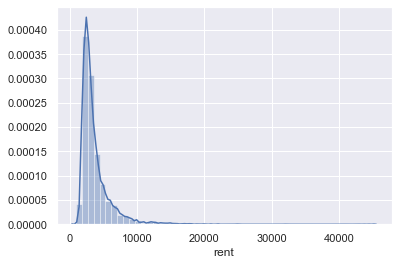

In [144]:
#histogram of rent
sns.distplot(df['rent'])

Observe that the data:
 - Deviates from the normal distribution
 - Has appreciable positive skewedness. You can see this from the long right tail.
 - Shows peakedness. 

In [145]:
print("Skewness: %f" % df['rent'].skew()) 
print("Kurtosis: %f" % df['rent'].kurt())

Skewness: 4.002709
Kurtosis: 30.371944


Skewness measures the asymmetry in a distribution. A perfectly symmetrical distribution has a skewness of 0. The skewness is greater than 0 and so the data is said to be positively skewed. This matches with the observation of a long right tail in the histogram.

Kurtosis measures the heaviness of the tails in a distribution. The kurtosis of a standard normal distribution is 3. Since the kurtosis of the distribution is much greater than 3, we can infer that the data has relatively more outliers than a standard normal distribution.

Taking both of these measures into account, we can guess that the rental price data will have many outliers to the right. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


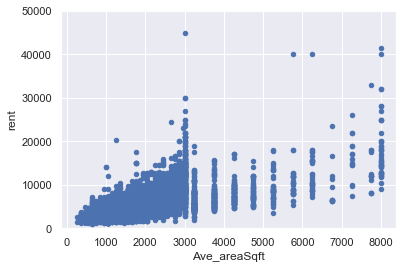

In [146]:
var = 'Ave_areaSqft'
data = pd.concat([df['rent'], df[var]], axis=1)
data.plot.scatter(x=var, y='rent', ylim=(0,50000));

Observations:
 - Ave_areaSqft and rent have a positive relationship (This matches general intuition, larger properties have higher rents)
 - A majority of points cluster below 3000Sqft and have a rent around $10000

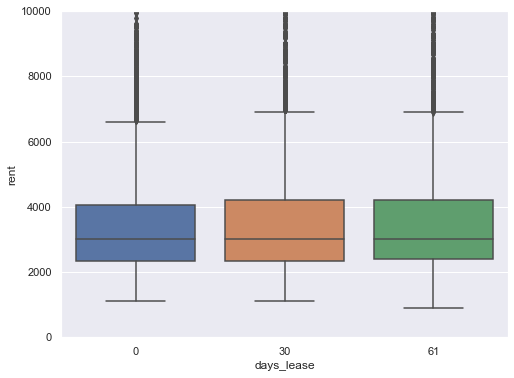

In [147]:
var = 'days_lease'
data = pd.concat([df['rent'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=10000);

Observations:
 - All of the data was taken within 61 days from data collection. It is likely then that the contracts recorded only considered newly registered properties. It would be an interesting extension to observe the data from properties over many years.
 - Nonetheless, there seems to be no appreciable relationship between days_lease and rent
 - Thus it will not be considered in the final model.

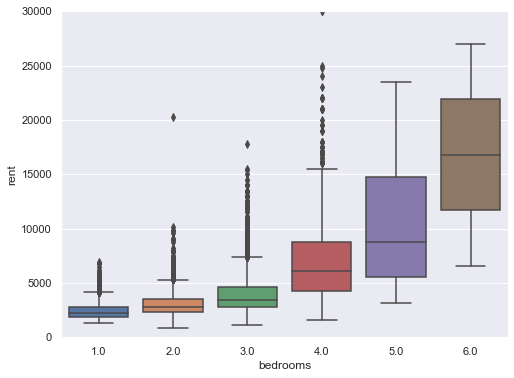

In [148]:
var = 'bedrooms'
data = pd.concat([df['rent'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=30000);

Observations:
 - Bedrooms and rent have a positive relationship. Perhaps even an exponential relationship?
 - There are quite a few outliers on the higher ends of rent (This corresponds to the heavy right skew seen previously)

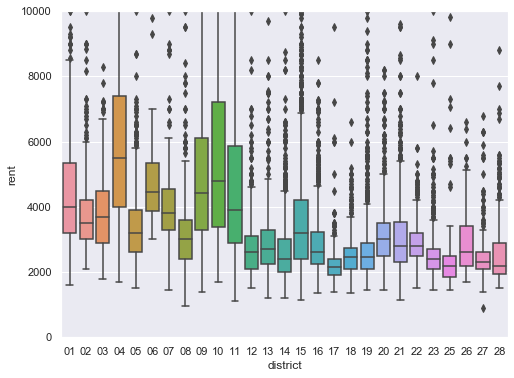

In [149]:
var = 'district'
data = pd.concat([df['rent'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=10000);

Observations:
 - Since Singapore postal districts that are close together in number are generally in close proximity, we can infer that some regions have a higher mean rent than others. 
 - We can see roughly 2 clusters of rental properties. The first cluster consists of districts 1-11 (Central Singapore) and has higher mean rents and wider interquartile ranges. The second cluster consists of districts 12-28 (The heartlands) and has lower mean rents and narrower interquartile ranges. 
- Curiously, district 12 (Balestier, Toa Payoh and Serangoon) is considered part of Central Singapore and one would assume that it would be in the first cluster. However, its rental price distribution more closely matches those in the second cluster. 
 - There are quite a few outliers on the higher ends of rent (This corresponds to the heavy right skew seen previously)

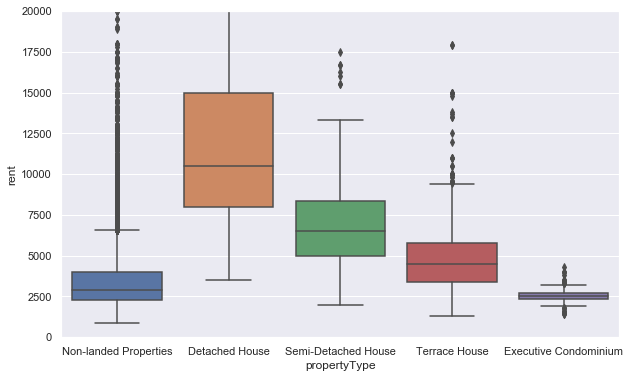

In [150]:
var = 'propertyType'
data = pd.concat([df['rent'], df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="rent", data=data)
fig.axis(ymin=0, ymax=20000);

Observations:
 - Executive condominiums and Non-landed Properties have smaller interquartile ranges and thus a smaller variance compared to other property types. This implies that the rental prices for these properties, and especially for the Executive condominium, are not so dependent on other factors or do not vary much in terms of other factors (e.g. areaSqft)

In [151]:
print('Number of unique streets: %f' % df['street'].nunique())
print('Number of unique projects: %f' % df['project'].nunique())

Number of unique streets: 1111.000000
Number of unique projects: 2193.000000


Observations:
- There are a large number of unique streets and projects relative to the size of the total dataset, thus we can say that these two variables have high cardinality.
- This would make it difficult convert these categorical variables into continuous ones using conventional methods. In addition, it is also unlikely for the algorithm to be able to uncover any trend purely by street name or project. 
- On top of the reasons stated above, the geographic location of the property is already considered by the 'district' feature and that feature does show an appreciable relationship with rental prices.
- Hence, these variables will not be considered in the final model.

In [152]:
#Deleting features that do not contribute to the model. 
del df['days_lease']
del df['street']
del df['project']
del df['x']
del df['y']
df


,propertyType,district,rent,bedrooms,Ave_areaSqft
0,Non-landed Properties,15,4200,3.0,1450.0
1,Non-landed Properties,15,6300,4.0,2650.0
2,Non-landed Properties,15,5700,3.0,2350.0
3,Non-landed Properties,15,4800,3.0,2350.0
4,Non-landed Properties,15,1900,1.0,550.0
...,...,...,...,...,...
21161,Executive Condominium,19,2350,2.0,750.0
21162,Executive Condominium,19,2900,3.0,1050.0
21163,Executive Condominium,19,2800,3.0,1050.0
21164,Executive Condominium,19,2800,3.0,1050.0


Overall, I will be considering 4 features (propertyType, district, bedrooms and Ave_areaSqft) to predict the rent

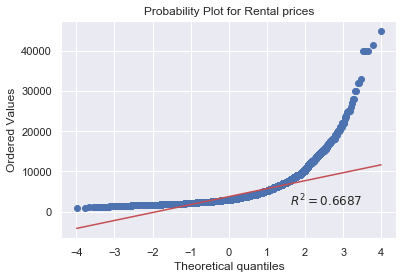

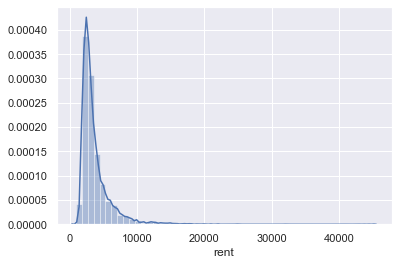

In [153]:
stats.probplot(df['rent'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles")
plt.title("Probability Plot for Rental prices")
plt.show()
sns.distplot(df['rent'])

Since the probability plot of the rent prices deviate significantly from a diagonal line due to its heavy right tail, we can use a log transformation on the data to normalise it.

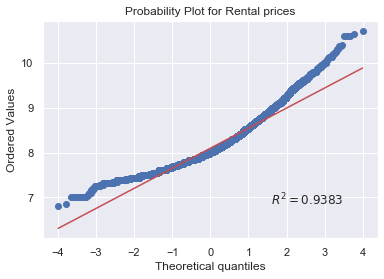

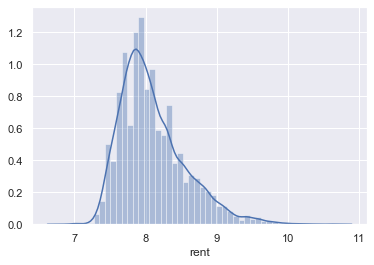

In [154]:
df['rent'] = np.log(df['rent'])
stats.probplot(df['rent'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles")
plt.title("Probability Plot for Rental prices")
plt.show()
sns.distplot(df['rent'])

After taking the natural log of the rent prices, the probability plot now appears to closely follow the diagonal line. This helps to mitigate most of the positive skew.

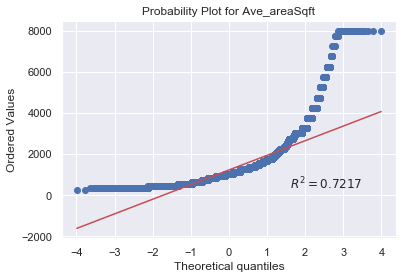

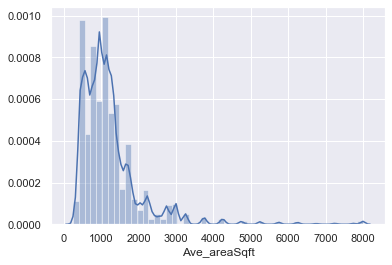

In [155]:
stats.probplot(df['Ave_areaSqft'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles")
plt.title("Probability Plot for Ave_areaSqft")
plt.show()
sns.distplot(df['Ave_areaSqft'])

In observing the same heavy right tail in the Ave_areaSqft data, we apply a log transformation once again.

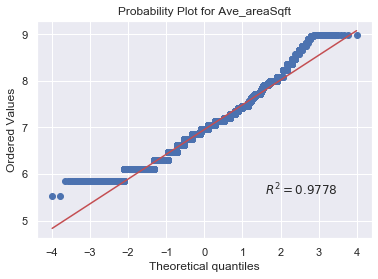

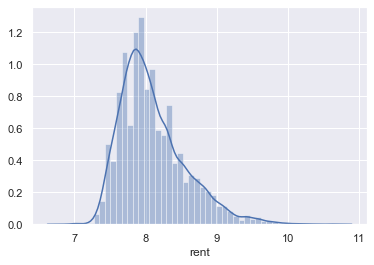

In [156]:
df['Ave_areaSqft'] = np.log(df['Ave_areaSqft'])
stats.probplot(df['Ave_areaSqft'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles")
plt.title("Probability Plot for Ave_areaSqft")
plt.show()
sns.distplot(df['rent'])

In [157]:
#In order to process the data further, we encode the propertyType variable


df["propertyType"] = df["propertyType"].astype('category')
d = dict( enumerate(df['propertyType'].cat.categories ) )
print (d)
df["propertyType"] = df["propertyType"].cat.codes
df.head()




{0: 'Detached House', 1: 'Executive Condominium', 2: 'Non-landed Properties', 3: 'Semi-Detached House', 4: 'Terrace House'}


,propertyType,district,rent,bedrooms,Ave_areaSqft
0,2,15,8.342840,3.0,7.279319
1,2,15,8.748305,4.0,7.882315
2,2,15,8.648221,3.0,7.762171
3,2,15,8.476371,3.0,7.762171
4,2,15,7.549609,1.0,6.309918


C:\Users\erick\Anaconda\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\erick\Anaconda\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


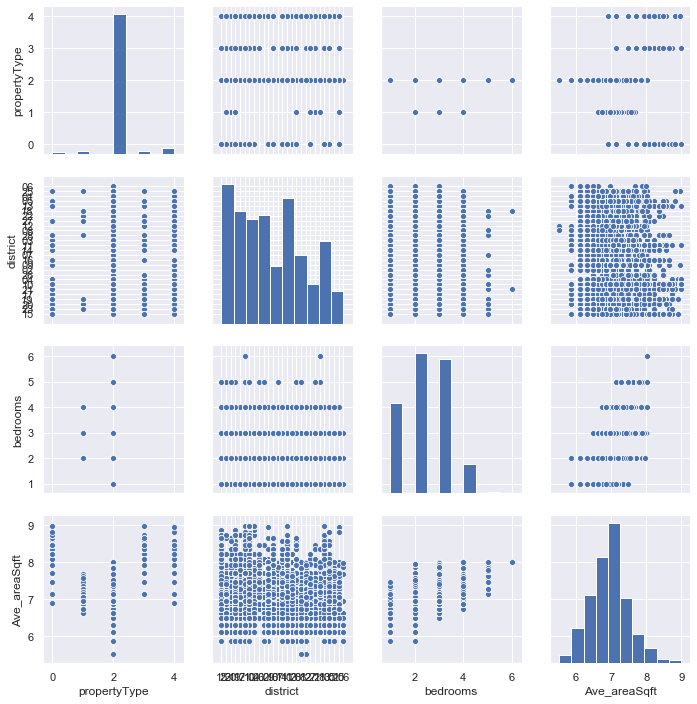

In [158]:
#To test for collinearity

sns.set()
cols = ['propertyType', 'district', 'bedrooms', 'Ave_areaSqft']
sns.pairplot(df[cols], height = 2.5)
plt.show();

From the scatterplots, we notice that most of the independent variables are not linearly related to each other. The only one with a possible linear relationship is bedrooms and Ave_areaSqft. This makes sense since more rooms usually results in more space. For now, I will leave both features in. Nonetheless, it would be interesting to use PCA to combine the variables together and see how it affects the accuracy of the machine learning algorithm.

At this point, the data appears to be ready to be used in the Machine Learning phase of this project.